In [17]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from ast import literal_eval
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.cluster import DBSCAN
from scipy.cluster.hierarchy import dendrogram, linkage

Load + View data

In [14]:
data_dir = "data"
output_csv = os.path.join(data_dir, "antique_train_with_embeddings.csv")

# Define parsing function to properly load embeddings
def parse_embedding(text):
    return np.array(literal_eval(text), dtype=np.float32)  # Ensures proper float32 parsing

# Reload the CSV and correctly parse embeddings
train_df = pd.read_csv(output_csv, converters={
    "query_embedding": parse_embedding,
    "doc_embedding": parse_embedding
})

# Display first few rows
print("Train Combined DataFrame after reloading:")
display(train_df.head())

# Verify the dtype of the embeddings
print(f"Query Embedding Type: {type(train_df['query_embedding'].iloc[0])}")
print(f"Document Embedding Type: {type(train_df['doc_embedding'].iloc[0])}")

Train Combined DataFrame after reloading:


,query_id,doc_id,relevance,iteration,query_text,doc_text,query_embedding,doc_embedding
0,2531329,2531329_0,4,U0,Why do some men spit into the urinal before ur...,I do it all the time. It is kind of a ritual ...,"[0.06218869, -0.015421811, 0.040496606, -0.035...","[0.062536575, 0.040674195, -0.009761466, -0.00..."
1,2531329,2531329_5,4,Q0,Why do some men spit into the urinal before ur...,To clear out the mucus deep down in the throat...,"[0.06218869, -0.015421811, 0.040496606, -0.035...","[0.0852715, -0.03753829, 0.09838569, -0.060526..."
2,2531329,2531329_4,3,Q0,Why do some men spit into the urinal before ur...,"maybe they want a target to hit. Well, I gues...","[0.06218869, -0.015421811, 0.040496606, -0.035...","[0.13832319, -0.0030896335, 0.025617702, 0.022..."
3,2531329,2531329_7,3,Q0,Why do some men spit into the urinal before ur...,Where else would we spit?... Apart from sports...,"[0.06218869, -0.015421811, 0.040496606, -0.035...","[0.05865018, 0.019921783, 0.024955682, -0.0864..."
4,2531329,2531329_6,3,Q0,Why do some men spit into the urinal before ur...,Because they have a cough or phlegm and hacked...,"[0.062188666, -0.01542176, 0.040496618, -0.035...","[0.08216521, 0.040984903, 0.061341062, 0.00640..."


Query Embedding Type: <class 'numpy.ndarray'>
Document Embedding Type: <class 'numpy.ndarray'>


EDA

In [18]:
# Reduce to 2D using PCA first (faster) before applying TSNE
pca = PCA(n_components=50)  # Reduce dimensionality first for better t-SNE results
tsne = TSNE(n_components=2, perplexity=30, random_state=42)

query_emb_2d = tsne.fit_transform(pca.fit_transform(np.vstack(train_df["query_embedding"])))
doc_emb_2d = tsne.fit_transform(pca.fit_transform(np.vstack(train_df["doc_embedding"])))

In [19]:
# Add to DataFrame
train_df["query_emb_x"], train_df["query_emb_y"] = query_emb_2d[:, 0], query_emb_2d[:, 1]
train_df["doc_emb_x"], train_df["doc_emb_y"] = doc_emb_2d[:, 0], doc_emb_2d[:, 1]

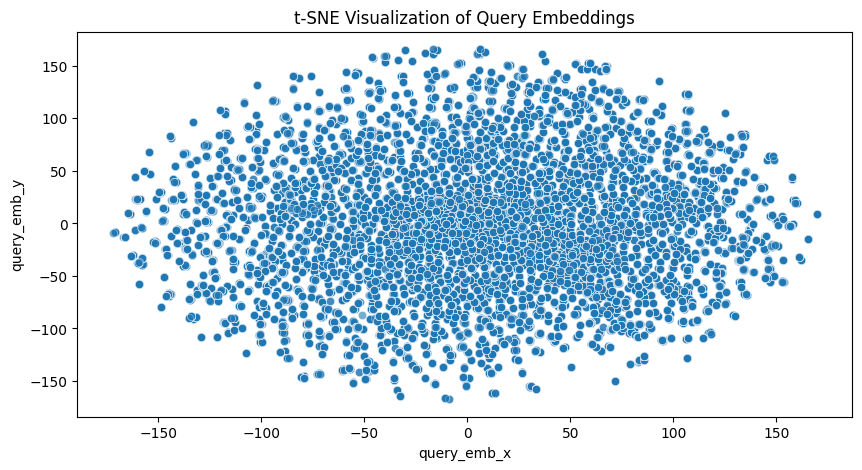

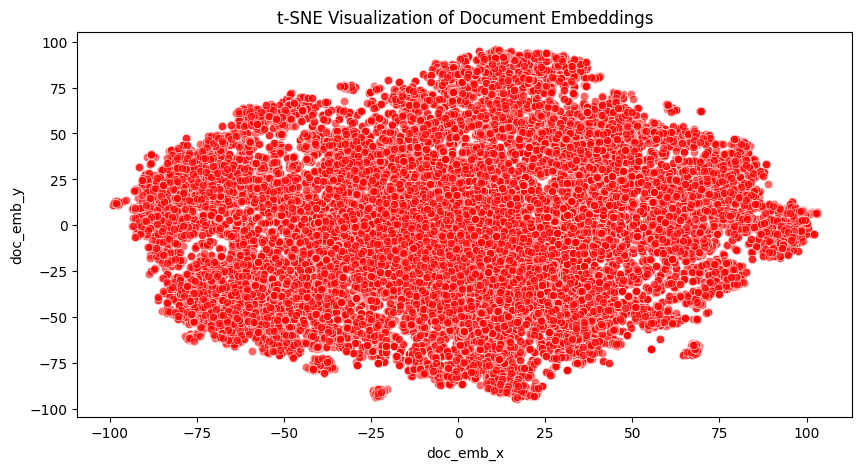

In [20]:
# Plot query embeddings
plt.figure(figsize=(10, 5))
sns.scatterplot(x="query_emb_x", y="query_emb_y", data=train_df, alpha=0.6)
plt.title("t-SNE Visualization of Query Embeddings")
plt.show()

# Plot document embeddings
plt.figure(figsize=(10, 5))
sns.scatterplot(x="doc_emb_x", y="doc_emb_y", data=train_df, alpha=0.6, color="red")
plt.title("t-SNE Visualization of Document Embeddings")
plt.show()